#Chest X-ray Images Classification

##Creating an image classification guide

##Context
Pneumonia is an infection that inflames the air sacs in one or both lungs. 
It kills more children younger than 5 years old each year than any other infectious disease, such as HIV infection, malaria, 
or tuberculosis. Diagnosis is often based on symptoms and physical examination. Chest X-rays may help confirm the diagnosis.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os 

In [3]:
os.listdir('/content/drive/MyDrive/X_rays/train/NORMAL')[:10]

['NORMAL-3399582-0002.jpeg',
 'NORMAL-3411116-0001.jpeg',
 'NORMAL-3402813-0001.jpeg',
 'NORMAL-3502771-0002.jpeg',
 'NORMAL-3482198-0003.jpeg',
 'NORMAL-3482198-0001.jpeg',
 'NORMAL-3411116-0002.jpeg',
 'NORMAL-3518933-0001.jpeg',
 'NORMAL-339692-0001.jpeg',
 'NORMAL-3400382-0001.jpeg']

In [4]:
from tensorflow import keras

In [5]:
import tensorflow as tf
from keras.layers import Dense,Flatten
from keras.models import Sequential,Model
from keras.applications.inception_v3 import InceptionV3,preprocess_input
from keras.preprocessing.image import ImageDataGenerator

* tensorflow -> Create production-grade machine learning models on any device with TensorFlow by Google. TensorFlow is an E2E platform that makes it easy for you to build and deploy ML models. https://www.tensorflow.org/

* Dense -> The `Dense` layer is a core layer in the Keras API. It is used to create fully connected neural network layers, where each neuron in the layer is connected to every neuron in the previous layer. https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

* Flatten -> The `Flatten` layer is also a core layer in the Keras API and is used to flatten the input to a one-dimensional array, which is useful when the input shape is not suitable for the subsequent layers in the neural network. https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten

* Sequential -> The `Sequential` model is a linear stack of layers in Keras. It is a very common and straightforward way to create deep learning models. In a Sequential model, you can simply add layers one after the other, and Keras will automatically infer the shape of the inputs for each layer. https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

* InceptionV3 -> `InceptionV3` is a pre-trained convolutional neural network (CNN) architecture that is available in Keras. It was trained on the ImageNet dataset, which contains millions of labeled images across thousands of classes. The `InceptionV3` architecture is known for its high accuracy and efficient use of computation resources. https://www.tensorflow.org/api_docs/python/tf/keras/applications/inception_v3

* preprocess_input -> `preprocess_input` is a function available in Keras that is used to preprocess input images before they are fed into a deep learning model. It performs operations such as mean subtraction and scaling to make the images suitable for the specific pre-trained model being used. https://www.tensorflow.org/api_docs/python/tf/keras/applications/inception_v3/preprocess_input

* ImageDataGenerator -> `ImageDataGenerator` is a class in Keras that is used to generate batches of tensor image data with real-time data augmentation. It can be used for training deep learning models on large datasets of images. https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

#Preprocessing Images

In [6]:
train_datagen=ImageDataGenerator(    featurewise_center=True,
                                        featurewise_std_normalization=True,
                                        rotation_range=20,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                      horizontal_flip=True,
                                      rescale=1./255,        
                                      shear_range=0.2,
                                            zoom_range=0.2)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/X_rays/train',
        target_size=(256, 256),
        batch_size=32,
      class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/X_rays/test',
        target_size=(256, 256),
        batch_size=32,class_mode='binary')

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
for i in range(5):
    x_batch, y_batch = train_generator.next()

In [ ]:
y_batch

array([0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1.],
      dtype=float32)

In [ ]:
x_batch[0]

array([[[0.04127221, 0.04127221, 0.04127221],
        [0.04705883, 0.04705883, 0.04705883],
        [0.04027748, 0.04027748, 0.04027748],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.04112883, 0.04112883, 0.04112883],
        [0.04705883, 0.04705883, 0.04705883],
        [0.04049255, 0.04049255, 0.04049255],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.04098545, 0.04098545, 0.04098545],
        [0.04705883, 0.04705883, 0.04705883],
        [0.04070762, 0.04070762, 0.04070762],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.07885362, 0.07885362, 0.07885362],
        [0.0824239 , 0.0824239 , 0.0824239 ],
        [0.07225212, 0

In [15]:
import matplotlib.pyplot as plt
import numpy as np

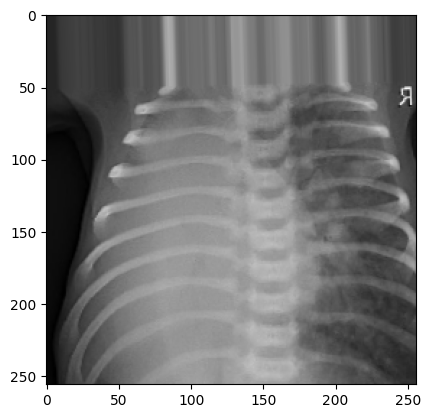

In [ ]:
plt.imshow(x_batch[12])

In [ ]:
x_batch[0].shape

(256, 256, 3)

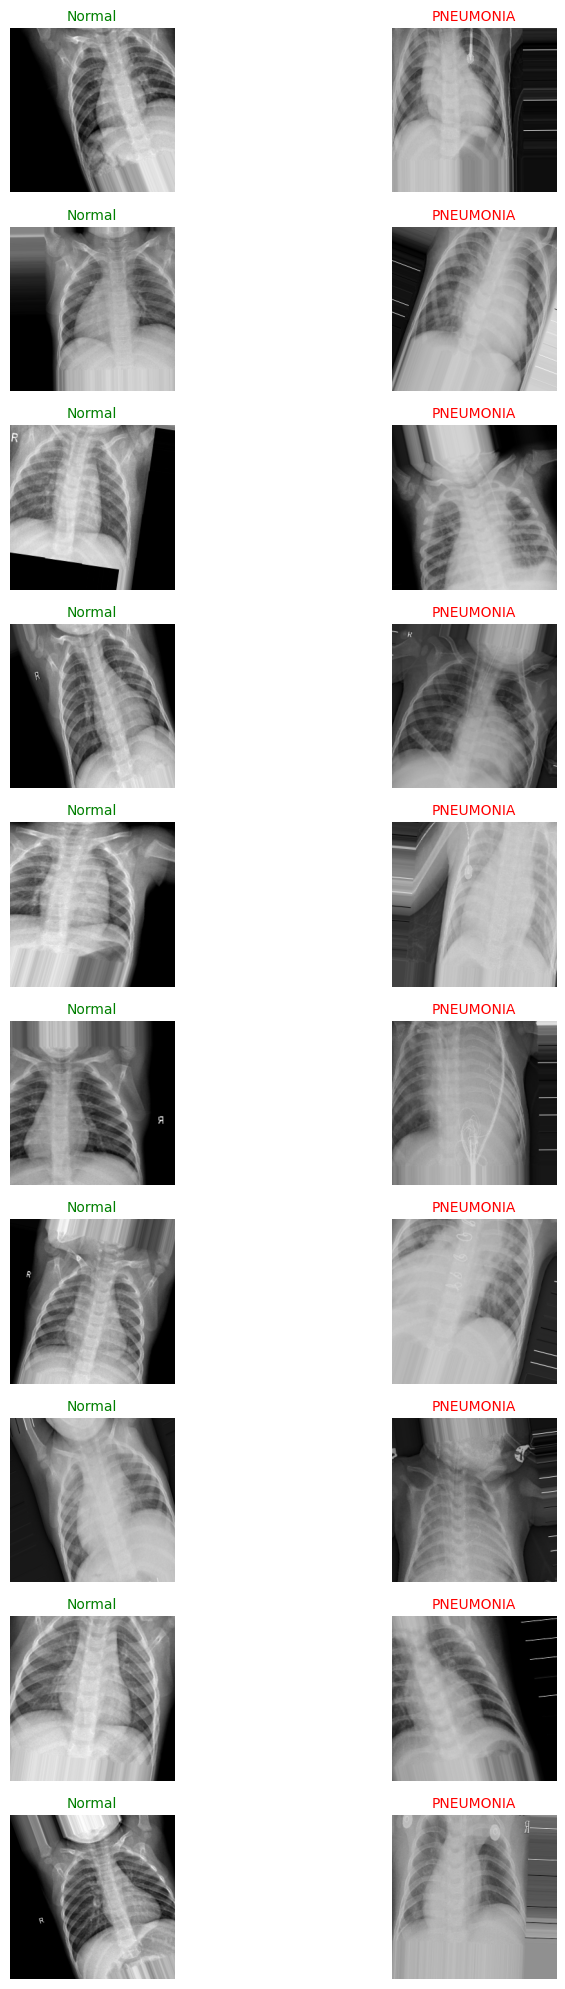

In [ ]:


# Define the number of images to plot for each class
num_images = 10

# Define the figure and subplots
fig, axs = plt.subplots(nrows=10, ncols=2, figsize=(10, 20))

# Define the class names and colors
class_names = ['Normal', 'PNEUMONIA']
colors = ['green', 'red']

# Loop over the classes
for i, class_name in enumerate(class_names):

    # Get the first num_images images for the class from the train generator
    imgs, labels = None, None
    while imgs is None or np.sum(labels == i) < num_images:
        imgs, labels = train_generator.next()
        imgs = imgs[labels == i]
    imgs = imgs[:num_images]
    
    # Loop over the images and plot them
    for j, img in enumerate(imgs):
        # Plot the image on the appropriate subplot
        axs[j][i].imshow(img)
        axs[j][i].axis('off')
        axs[j][i].set_title(class_name, fontsize=10, color=colors[i])
        
        # Break out of the loop if we have plotted the desired number of images
        # if j == num_images - 1:
        #     break
        
plt.tight_layout()
plt.show()


#Working On model

##basic CNN

In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D

In [ ]:

# Build the model
model = Sequential()

# Add the convolutional layers
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output and add the dense layers
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=5, validation_data=validation_generator)


Epoch 1/5
164/164 [==============================] - 544s 3s/step - loss: 0.5557 - accuracy: 0.7882 - val_loss: 0.4705 - val_accuracy: 0.7500
Epoch 2/5
164/164 [==============================] - 147s 896ms/step - loss: 0.3193 - accuracy: 0.8637 - val_loss: 0.4338 - val_accuracy: 0.7788
Epoch 3/5
164/164 [==============================] - 149s 911ms/step - loss: 0.2999 - accuracy: 0.8691 - val_loss: 0.3732 - val_accuracy: 0.8413
Epoch 4/5
164/164 [==============================] - 147s 897ms/step - loss: 0.2943 - accuracy: 0.8687 - val_loss: 0.2847 - val_accuracy: 0.8942
Epoch 5/5
164/164 [==============================] - 145s 887ms/step - loss: 0.2659 - accuracy: 0.8851 - val_loss: 0.3168 - val_accuracy: 0.8814


In [7]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_loss', patience=5, mode='min')


In [ ]:
#another try
# Build the model
model1 = Sequential()

# Add the convolutional layers
model1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model1.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output and add the dense layers
model1.add(Flatten())
model1.add(Dense(units=128, activation='relu'))
model1.add(Dense(units=64, activation='relu'))
model1.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model1.fit(train_generator, epochs=5, validation_data=validation_generator,callbacks=[checkpoint,early_stop])


Epoch 1/5
164/164 [==============================] - 155s 921ms/step - loss: 0.4660 - accuracy: 0.7693 - val_loss: 0.6918 - val_accuracy: 0.6202
Epoch 2/5
164/164 [==============================] - 152s 923ms/step - loss: 0.3722 - accuracy: 0.8240 - val_loss: 0.5636 - val_accuracy: 0.6987
Epoch 3/5
164/164 [==============================] - 148s 904ms/step - loss: 0.3252 - accuracy: 0.8610 - val_loss: 0.6952 - val_accuracy: 0.6683
Epoch 4/5
164/164 [==============================] - 151s 919ms/step - loss: 0.2987 - accuracy: 0.8775 - val_loss: 0.4568 - val_accuracy: 0.7420
Epoch 5/5
164/164 [==============================] - 153s 928ms/step - loss: 0.2758 - accuracy: 0.8823 - val_loss: 0.4495 - val_accuracy: 0.7660


#try InceptionV3


In [ ]:
Inc=InceptionV3(input_shape=(256,256,3),include_top=False)

In [ ]:
for layer in Inc.layers:
  layer.trainable = False

In [ ]:
X=Flatten()(Inc.output)
X=Dense(1,activation='sigmoid')(X)
fmodel=Model(Inc.input,X)

In [ ]:
fmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
fmodel.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_193 (Conv2D)            (None, 127, 127, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 127, 127, 32  96         ['conv2d_193[0][0]']             
 Normalization)                 )                                                             

In [ ]:
fmodel.fit(train_generator, epochs=25, validation_data=validation_generator,callbacks=[checkpoint,early_stop])

Epoch 1/25
164/164 [==============================] - 164s 937ms/step - loss: 0.7440 - accuracy: 0.8888 - val_loss: 0.6620 - val_accuracy: 0.8317
Epoch 2/25
164/164 [==============================] - 170s 1s/step - loss: 0.3763 - accuracy: 0.9193 - val_loss: 0.7510 - val_accuracy: 0.8494
Epoch 3/25
164/164 [==============================] - 152s 927ms/step - loss: 0.4189 - accuracy: 0.9213 - val_loss: 1.2766 - val_accuracy: 0.8253
Epoch 4/25
164/164 [==============================] - 159s 970ms/step - loss: 0.4081 - accuracy: 0.9279 - val_loss: 1.4781 - val_accuracy: 0.8221
Epoch 5/25
164/164 [==============================] - 164s 998ms/step - loss: 0.4847 - accuracy: 0.9270 - val_loss: 0.7454 - val_accuracy: 0.8958
Epoch 6/25
164/164 [==============================] - 151s 920ms/step - loss: 0.5193 - accuracy: 0.9279 - val_loss: 0.5288 - val_accuracy: 0.9071
Epoch 7/25
164/164 [==============================] - 150s 913ms/step - loss: 0.4341 - accuracy: 0.9385 - val_loss: 0.7419 - va

In [7]:
from tensorflow.keras.applications.densenet import DenseNet121
Den=DenseNet121(input_shape=(256,256,3),include_top=False)

In [8]:
for layer in Den.layers:
  layer.trainable = False

In [9]:
X=Flatten()(Den.output)
X=Dense(1,activation='sigmoid')(X)
dmodel=Model(Den.input,X)

In [10]:
dmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
dmodel.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 128, 128, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [16]:
checkpoint1 = ModelCheckpoint('/content/drive/MyDrive/X_rays/dbest_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

In [17]:
dmodel.fit(train_generator, epochs=15, validation_data=validation_generator,callbacks=[checkpoint1,early_stop])

Epoch 1/15
164/164 [==============================] - 1285s 8s/step - loss: 0.5024 - accuracy: 0.9008 - val_loss: 0.3150 - val_accuracy: 0.9199
Epoch 2/15
164/164 [==============================] - 160s 973ms/step - loss: 0.2739 - accuracy: 0.9348 - val_loss: 0.3943 - val_accuracy: 0.9119
Epoch 3/15
164/164 [==============================] - 156s 949ms/step - loss: 0.2425 - accuracy: 0.9461 - val_loss: 1.2154 - val_accuracy: 0.8301
Epoch 4/15
164/164 [==============================] - 160s 979ms/step - loss: 0.4078 - accuracy: 0.9352 - val_loss: 0.4073 - val_accuracy: 0.9391
Epoch 5/15
164/164 [==============================] - 156s 952ms/step - loss: 0.2501 - accuracy: 0.9534 - val_loss: 0.5060 - val_accuracy: 0.9263
Epoch 6/15
164/164 [==============================] - 157s 955ms/step - loss: 0.3452 - accuracy: 0.9451 - val_loss: 1.1332 - val_accuracy: 0.8814


In [8]:
from keras.models import load_model
final_model=load_model('/content/drive/MyDrive/X_rays/dbest_model.h5')


In [9]:
final_model.evaluate(validation_generator)

20/20 [==============================] - 103s 5s/step - loss: 0.4073 - accuracy: 0.9391


[0.40733274817466736, 0.9391025900840759]

In [10]:
#my

def get_img_array(image_path, target_size=(256,256)):
    test_datagen = ImageDataGenerator(rescale=1./255)
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    test_img = test_datagen.flow(x, batch_size=1)
    return test_img

In [11]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
def generate_test_image(image_path, target_size=(256,256)):
    img = load_img(image_path, target_size=target_size)
    img = img_to_array(img)
    img=np.array([img])
    img/=255.0
    return img


In [12]:
def get_img_array(img_path, size=(256,256)):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array/255.0

In [69]:
def predict_my_test(image_path,model=final_model):
  pred=final_model.predict(generate_test_image(image_path))
  if pred>=0.5:
    return 'PNEUMONIA'
  else:
    return 'NORMAL'

In [35]:
import matplotlib.cm as cm
from IPython.display import Image,display

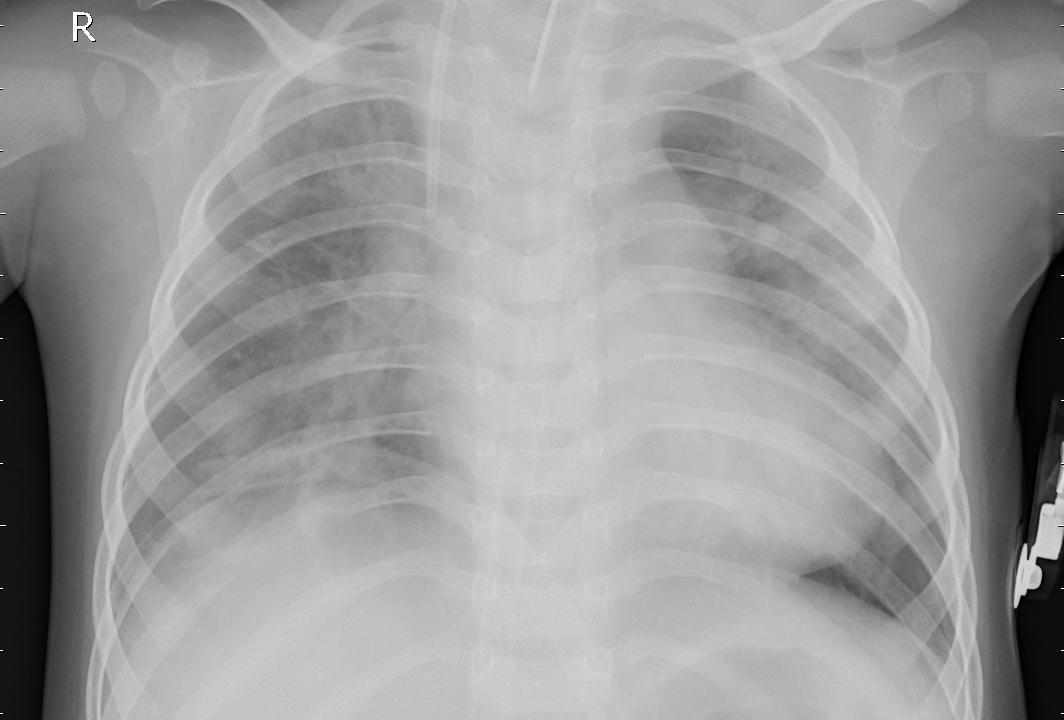

In [51]:
model_builder = keras.applications.densenet.DenseNet201
img_size = (224, 224)
preprocess_input = keras.applications.densenet.preprocess_input
decode_predictions = keras.applications.densenet.decode_predictions

last_conv_layer_name = "conv5_block16_concat"

# The local path to our target image
img_path = '/content/drive/MyDrive/X_rays/test/PNEUMONIA/BACTERIA-1135262-0001.jpeg'

display(Image(img_path))

In [57]:
def get_img_array(img_path, size=(224,224)):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [64]:
img_path='/content/drive/MyDrive/X_rays/test/PNEUMONIA/BACTERIA-1135262-0003.jpeg'

In [70]:
predict_my_test(image_path=img_path)

1/1 [==============================] - 0s 219ms/step


'PNEUMONIA'

1/1 [==============================] - 3s 3s/step
Predicted: [('n04590129', 'window_shade', 7.3135853)]


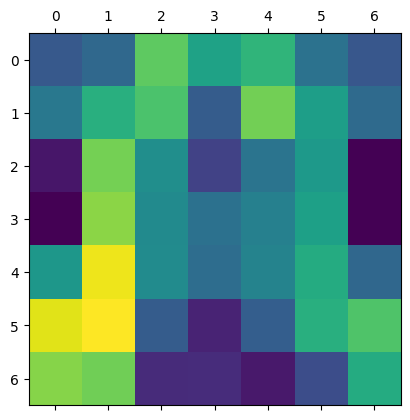

In [66]:
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder(weights="imagenet")

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

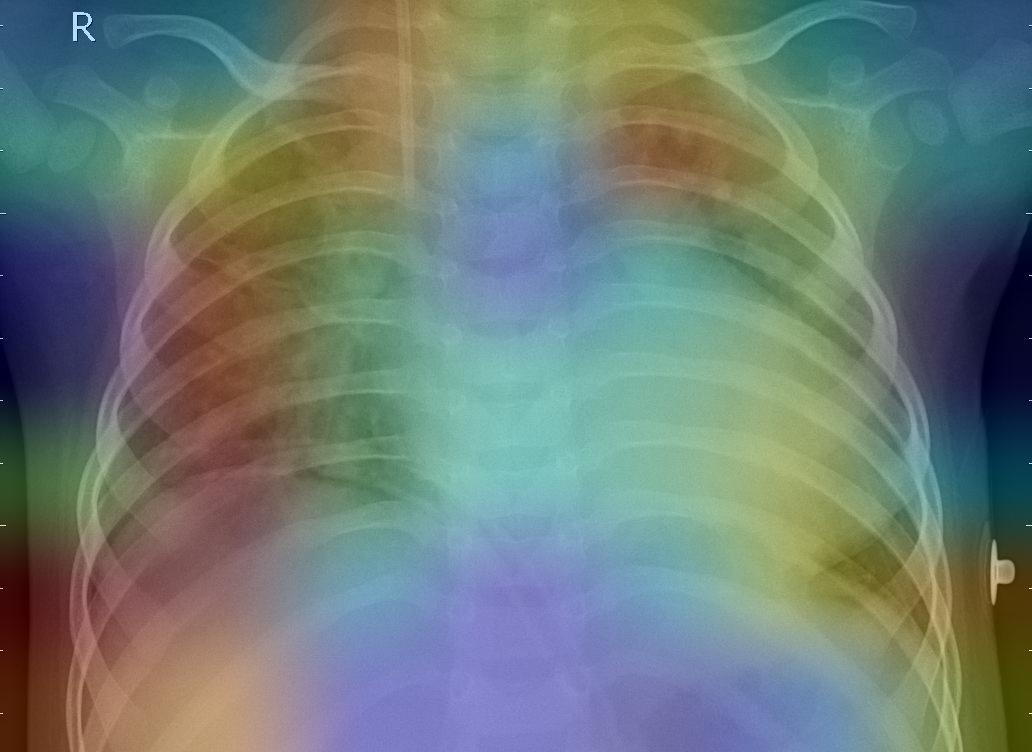

In [71]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)